# Data Visualisation

In this notebook, we will visualise the data we have combined:
- LF Data
- RF Data
- Wrist Data
- Waist Data

We can select the Subject Id and the Activity that we are interested in.

In [122]:
# !pip install ggplot

In [123]:
from ggplot import *
import pandas as pd

In [124]:
####### Select Subject Id #######
# Key in a number from 1 to 20. 

# 1 to 11: indoors
# 12 to 20: outdoors

SUBJECT_ID = '4'

###### Select Activity ###### 
# Key in one of the options below:

## For indoors: 
# treadmill_walk
# treadmill_walknrun
# treadmill_slope_walk
# indoor_walk
# indoor_walknrun

## For outdoors:
# outdoor_walk
# outdoor_walknrun

ACTIVITY = 'indoor_walknrun'

###### Select Segment ######
start = 1
end = 500

In [125]:
# Read in the data
DATA_PATH = './Combined Data_csv format/'

df = pd.read_csv(DATA_PATH + 'Sub_'+ SUBJECT_ID + '.csv', header = 0)

In [126]:
# df = df.drop(df.columns[0], axis=1)
df.tail()

,Unnamed: 0,accX_LF,accY_LF,accZ_LF,accX_RF,accY_RF,accZ_RF,accX_Waist,accY_Waist,accZ_Waist,...,treadmill_slope_walk,treadmill_slope_walk_index,indoor_walk,indoor_walk_index,indoor_walknrun,indoor_walknrun_index,LF_HS,RF_HS,LF_TO,RF_TO
257856,257856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
257857,257857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
257858,257858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
257859,257859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
257860,257860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [127]:
# Subset out the data by activity of interest

k1=df[df[ACTIVITY]==1]
k1.head()

,Unnamed: 0,accX_LF,accY_LF,accZ_LF,accX_RF,accY_RF,accZ_RF,accX_Waist,accY_Waist,accZ_Waist,...,treadmill_slope_walk,treadmill_slope_walk_index,indoor_walk,indoor_walk_index,indoor_walknrun,indoor_walknrun_index,LF_HS,RF_HS,LF_TO,RF_TO
193650,193650,-1.412,-8.941,-3.451,-1.412,-5.804,-1.569,0.784,-8.157,2.039,...,0,0,1,1,1,1,0.0,0.0,0.0,0.0
193651,193651,-1.412,-8.941,-3.451,-1.098,-6.588,-1.882,0.941,-7.686,2.039,...,0,0,1,2,1,2,0.0,0.0,0.0,0.0
193652,193652,-1.098,-8.941,-3.608,-1.255,-7.059,-1.882,1.098,-7.686,2.510,...,0,0,1,3,1,3,0.0,0.0,0.0,0.0
193653,193653,-1.255,-8.941,-3.608,-1.882,-8.000,-1.882,1.412,-7.843,2.510,...,0,0,1,4,1,4,0.0,0.0,0.0,0.0
193654,193654,-0.784,-8.941,-3.922,-1.725,-8.627,-1.882,1.412,-7.686,2.667,...,0,0,1,5,1,5,0.0,0.0,0.0,0.0


In [128]:
k1.index

Int64Index([193650, 193651, 193652, 193653, 193654, 193655, 193656, 193657,
            193658, 193659,
            ...
            239941, 239942, 239943, 239944, 239945, 239946, 239947, 239948,
            239949, 239950],
           dtype='int64', length=46301)

In [129]:
k1.reset_index(level=0, inplace=True)

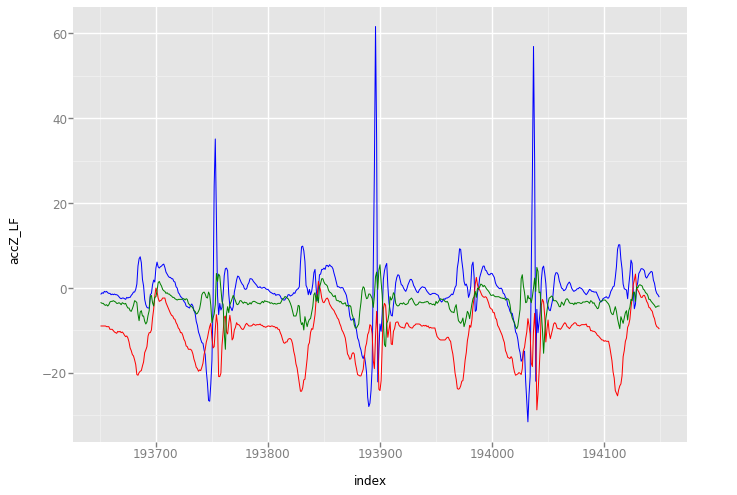

<ggplot: (7582840524)>

In [130]:
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_LF'), color='blue') +\
    geom_line(aes(y='accY_LF'), color='red') +\
    geom_line(aes(y='accZ_LF'), color='green')

In [131]:
# multiply the HS and TO by 30 (15) and -30 (15)
# this is to make it more obvious in the visualisation

k1['LF_HS_mult']= k1.LF_HS.apply(lambda x: (x*30))
k1['RF_HS_mult']= k1.RF_HS.apply(lambda x: (x*30))
k1['LF_TO_mult']= k1.LF_TO.apply(lambda x: (x*-30))
k1['RF_TO_mult']= k1.RF_TO.apply(lambda x: (x*-30))

k1['LF_HS_mult2']= k1.LF_HS.apply(lambda x: (x*15))
k1['RF_HS_mult2']= k1.RF_HS.apply(lambda x: (x*15))
k1['LF_TO_mult2']= k1.LF_TO.apply(lambda x: (x*-15))
k1['RF_TO_mult2']= k1.RF_TO.apply(lambda x: (x*-15))


/Users/tankh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tankh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tankh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

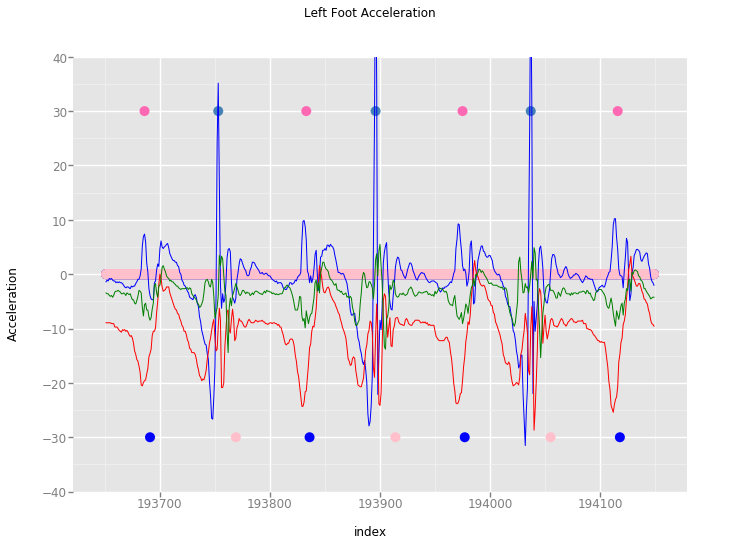

<ggplot: (7571651318)>

In [132]:
#Left Foot
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_LF'), color='blue') +\
    geom_line(aes(y='accY_LF'), color='red') +\
    geom_line(aes(y='accZ_LF'), color='green') +\
    geom_point(aes(y='LF_HS_mult'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult'), color='blue', size=100) +\
    geom_point(aes(y='RF_HS_mult'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult'), color='pink', size=100) +\
    scale_y_continuous(limits=(-40,40)) +\
    ggtitle('Left Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')

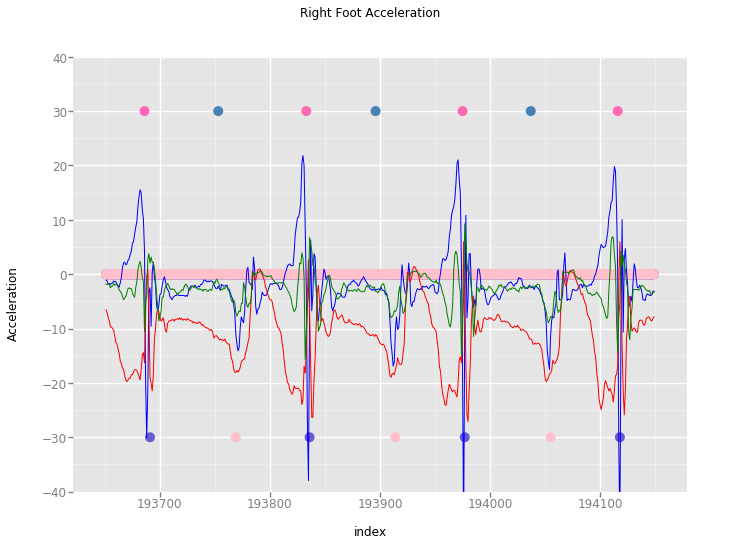

<ggplot: (7569127267)>

In [133]:
#Right Foot
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_RF'), color='blue') +\
    geom_line(aes(y='accY_RF'), color='red') +\
    geom_line(aes(y='accZ_RF'), color='green') +\
    geom_point(aes(y='LF_HS_mult'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult'), color='slateblue', size=100) +\
    geom_point(aes(y='RF_HS_mult'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult'), color='pink', size=100) +\
    scale_y_continuous(limits=(-40,40)) +\
    ggtitle('Right Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')

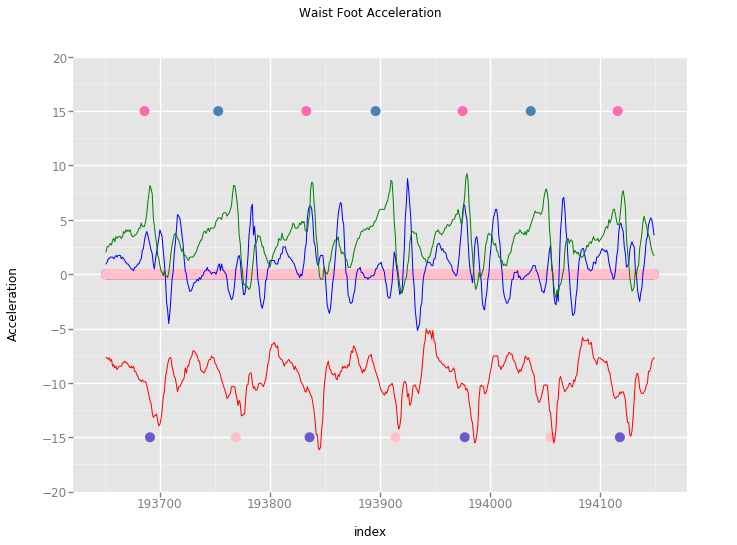

<ggplot: (-9223372029285646164)>

In [134]:
#Waist
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_Waist'), color='blue') +\
    geom_line(aes(y='accY_Waist'), color='red') +\
    geom_line(aes(y='accZ_Waist'), color='green') +\
    geom_point(aes(y='LF_HS_mult2'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult2'), color='slateblue', size=100) +\
    geom_point(aes(y='RF_HS_mult2'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult2'), color='pink', size=100) +\
    scale_y_continuous(limits=(-20,20)) +\
    ggtitle('Waist Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')

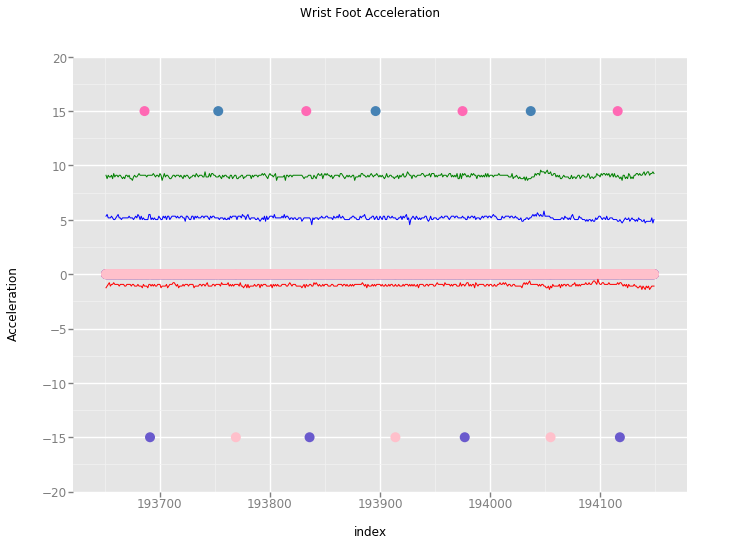

<ggplot: (7612020926)>

In [135]:
#Wrist
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_Wrist'), color='blue') +\
    geom_line(aes(y='accY_Wrist'), color='red') +\
    geom_line(aes(y='accZ_Wrist'), color='green') +\
    geom_point(aes(y='LF_HS_mult2'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult2'), color='slateblue', size=100) +\
    geom_point(aes(y='RF_HS_mult2'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult2'), color='pink', size=100) +\
    scale_y_continuous(limits=(-20,20)) +\
    ggtitle('Wrist Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')